In [439]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates

In [609]:

def buscar_dados_diarios():
   
    now = datetime.now()
    dia_hoje = now.day
    data_dia_anterior = now - timedelta(days=1)
    dia_anterior = (now - timedelta(days=1)).day    
    data_format = data_dia_anterior.strftime("%Y-%m-%d")
    hora_minuto = now.strftime("%H:%M")


    # dados_diarios = dados_diarios.loc[dados_diarios['day'] == dia_hoje,:]
        
    brasil_tickers =  ['ABEV3.SA', 'ALPA4.SA',  'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA','BRAP4.SA',
                       'BRFS3.SA', 'BRKM5.SA',  'CASH3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CPFE3.SA', 'CRFB3.SA', 'CSAN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA',
                       'EGIE3.SA', 'ELET3.SA',  'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA','EQTL3.SA', 'EZTC3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA',
                       'IGTI11.SA','IRBR3.SA',  'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA','LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
                       'NTCO3.SA', 'HYPE3.SA',  'PETR3.SA', 'PETR4.SA', 'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA' ,'RAIL3.SA', 'RENT3.SA', 'SANB11.SA','SBSP3.SA',
                       'SAPR4.SA', 'SAPR11.SA', 'SUZB3.SA', 'TAEE11.SA','TRPL4.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA','VALE3.SA', 'BRBI11.SA', 'RAIZ4.SA', 'RANI3.SA',
                       'KLBN3.SA', 'KLBN4.SA', 'KLBN11.SA'] # defina aqui os tickers

    
    for acao in brasil_tickers:
        caminho = 'dados_brutos/dados_'+ acao +'.csv'

        # Função para baixar dados do ticker selecionado com intervalo de 5 minutos
        def baixar_dados(ticker, start_date):
            data = yf.download(
                tickers=ticker,            
                start=start_date,           
                interval="5m"                                  
            )
            # start: Data de início no formato YYYY-MM-DD.
            # interval: Frequência dos dados (opções: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo).
            return data

        dados_diarios = baixar_dados(acao, data_format)
        dados_diarios['variacao'] = dados_diarios['Close'].pct_change()     
        dados_diarios['variacao'] = dados_diarios['variacao'].apply(lambda x: round(x * 100, 4))
        dados_diarios['variacao'] = (1 + dados_diarios['variacao']).cumprod() - 1
        dados_diarios = dados_diarios.loc[:,['Close', 'Volume', 'variacao']]
        
        dados_diarios.to_csv(caminho)
        
    # Criando lista de arquivos CSV
    caminho_dos_arquivos = 'dados_brutos/*.csv' 
    arquivos_csv = glob.glob(caminho_dos_arquivos)

    dfs = []

    # Loop para ler e processar cada arquivo CSV
    for arquivo in arquivos_csv:

        df = pd.read_csv(arquivo)
        
        nome_acao = arquivo.split('_')[-1].replace('.SA.csv', '')
        df['acao'] = nome_acao
        
        dfs.append(df)

    # Concatenar dataframes
    resultado = pd.concat(dfs, ignore_index=True)
    resultado['Datetime'] = pd.to_datetime(resultado['Datetime'])
    resultado['day'] = resultado['Datetime'].dt.day


    if resultado['day'].min() != dia_hoje or dia_anterior > dia_hoje:
        dados_dia_anterior = resultado.loc[resultado['day'] == dia_anterior,:]
        dados_dia_anterior.to_csv('df_dia_anterior.csv',index = False)
        resultado = resultado.loc[resultado['day'] == dia_hoje,:]
        resultado.to_csv('df_dia.csv', index=False)
    else:
        resultado.to_csv('df_dia.csv', index=False)
        print(f'algo errado',dia_hoje, dia_anterior)

buscar_dados_diarios()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# def gráfico e mensagem

In [642]:
def grafico(df1, lista_acoes, mean=False):
    plt.style.use("cyberpunk")
    tam_geral = 15
    all_variacoes = []

    fig, fig_acoes1 = plt.subplots(figsize = (tam_geral,tam_geral/2))

    for acao in lista_acoes:
        df_aux = df1.loc[df1['acao']==acao,:].copy()
        df_aux['variacao'] = df_aux['Close'].pct_change() 
        df_aux['variacao'] = (1 + df_aux['variacao']).cumprod() - 1
        df_aux['variacao'] = df_aux['variacao'].apply(lambda x: round(x * 100, 5))

        df_aux['variacao'] = df_aux['variacao'].fillna(0)
        fig_acoes1.plot(df_aux['Datetime'], df_aux['variacao'],label=acao)
        all_variacoes.append(df_aux[['Datetime','variacao']])

    lista_legend = lista_acoes
    if mean:
        # Média
        df_aux = pd.concat(all_variacoes,ignore_index=True)
        variacao_geral = df_aux.loc[:,['Datetime', 'variacao']].groupby('Datetime').mean()
        fig_acoes1.plot(variacao_geral.index, variacao_geral ,label='Tendência Geral', color='white', linestyle='--', linewidth= 1.5)
        lista_legend = lista_acoes + ['Média']

    # plt.title( )
    fig_acoes1.set_xlabel('Horário',fontsize=tam_geral )
    fig_acoes1.set_ylabel('Percentual de Variação',fontsize=tam_geral)

    y_min, y_max = fig_acoes1.get_ylim()
    margem = 0.1 * (y_max - y_min)
    fig_acoes1.set_ylim(y_min - margem, y_max + margem)

    fig_acoes = fig_acoes1.twinx()
    fig_acoes.set_ylim(fig_acoes1.get_ylim())

    fig_acoes.grid(color='white', linestyle='-', linewidth=0.2, alpha=0.5)
    fig_acoes1.grid(color='white', linestyle='-', linewidth=0.2, alpha=0.5)

    leg = fig_acoes1.legend(lista_legend, title = 'Ações', fontsize=tam_geral, title_fontsize=tam_geral, loc='lower left',             
                    bbox_to_anchor=(1.05, 0.4), borderaxespad=0.1, frameon=True)

    # Estilo da caixa
    leg.get_frame().set_color('black')  # Cor da caixa
    leg.get_frame().set_alpha(0.15)

    plt.tight_layout()
    plt.show()
    return  fig


In [605]:
def mensagem(df1, lista_acoes):
    frase = ''   
    variacoes_acoes = []
    for acao in lista_acoes:
        df_test = df1.loc[df1['acao'] == acao, :].copy()
        df_test['variacao'] = df_test['Close'].pct_change()
        df_test['variacao'] = (1 + df_test['variacao']).cumprod() - 1
        df_test['variacao'] = df_test['variacao'].apply(lambda x: round(x * 100, 5))

        if df_test.empty:
            print(f"Ação {acao} não encontrada ou sem dados.")
            continue

        variacao = df_test.iloc[-1, 3]
        variacoes_acoes.append((acao, variacao, df_test))
    
    # Ordenar as ações por variação (maior para menor)
    variacoes_acoes.sort(key=lambda x: x[1], reverse=True)

    for acao, variacao, df_test in variacoes_acoes:
        
        variacao = df_test.iloc[-1,3]
        if variacao > 0:
            simbolo = f"{Fore.GREEN}\u25B2{Style.RESET_ALL}"  
        elif variacao < 0:
            simbolo = f"{Fore.RED}\u25BC{Style.RESET_ALL}"  
        else:
            simbolo = "="  
        
        if len(acao) < 6:
            result = f"{acao}:  {df_test.iloc[-1,1]:.2f} " 
        else:
            result = f"{acao}: {df_test.iloc[-1,1]:.2f} "

        if len(f"{df_test.iloc[-1,1]:.2f}") <5:
            if df_test.iloc[-1,3] > 0:
                val = f" | +{df_test.iloc[-1,3]:.2f}% {simbolo}\n"
            else: 
                val = f" | {df_test.iloc[-1,3]:.2f}% {simbolo}\n"

        else:
            if df_test.iloc[-1,3] > 0:
                val = f"| +{df_test.iloc[-1,3]:.2f}% {simbolo}\n"
            else: 
                val = f"| {df_test.iloc[-1,3]:.2f}% {simbolo}\n"

        frase = frase + result + val

    frase = "Variação das ações selecionadas::\n" + frase
    return frase


## Testes

In [648]:
import mplcyberpunk as mp
from colorama import Fore, Style

df = pd.read_csv('df_dia.csv', parse_dates=['Datetime'])

lista_acoes = ['VALE3', 'BBSE3', 'SAPR4', 'BBAS3', 'TRPL4', 'KLBN4']

# fra = frase + mens_fin
mens = mensagem(df, lista_acoes)
print(mens)

fig = grafico(df, lista_acoes, mean=True)
fig.savefig('comparacao_de_acoes.png', dpi=300, bbox_inches='tight')

Variação das ações selecionadas::
SAPR4:  5.75  | +1.23% ▲
BBAS3:  26.95 | +0.30% ▲
KLBN4:  4.25  | +0.24% ▲
VALE3:  61.07 | +0.11% ▲
BBSE3:  34.36 | -0.15% ▼
TRPL4:  24.06 | -0.21% ▼



TypeError: grafico() got an unexpected keyword argument 'mean'

## testes

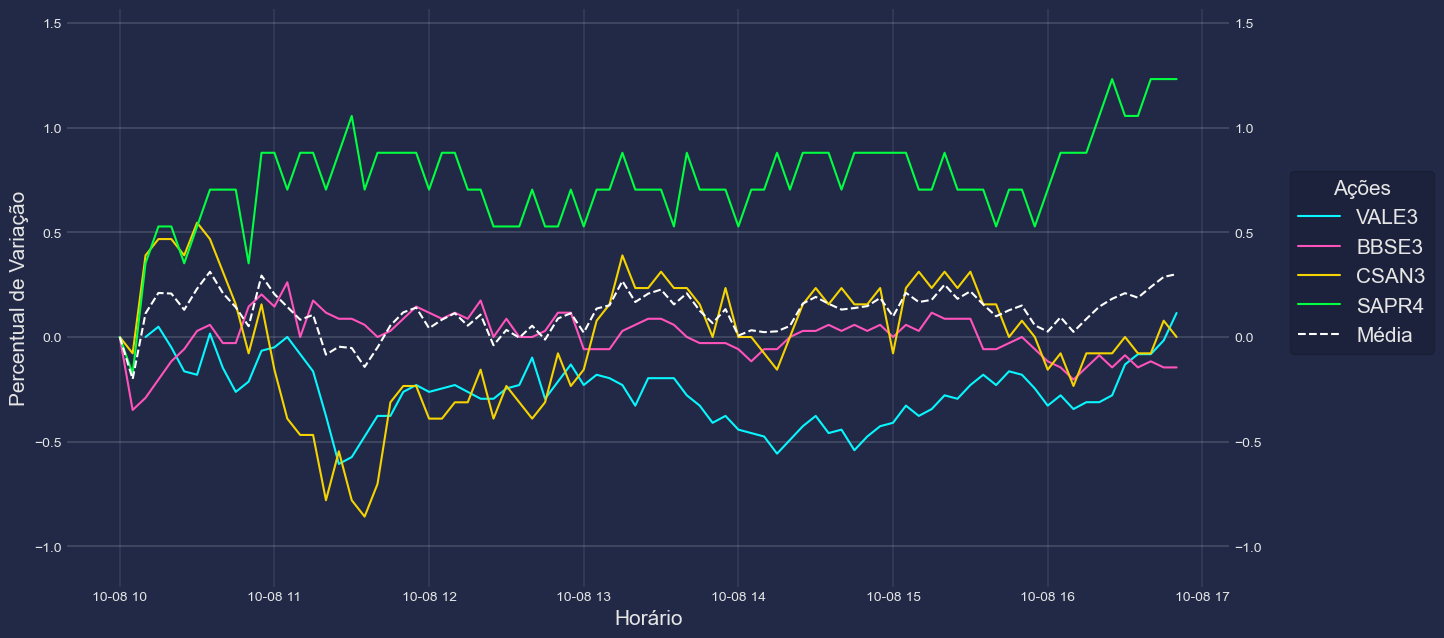

In [588]:

import mplcyberpunk as mp
from colorama import Fore, Style

plt.style.use("cyberpunk")
# plt.style.use("Solarize_Light2")
# plt.style.use("default")

df = pd.read_csv('df_dia.csv', parse_dates=['Datetime'])

# lista_acoes = ['VALE3','BBSE3', 'CSAN3', 'RAIZ4', 'BRBI11', 'BBAS3', 'SAPR4', 'SAPR11', 'TRPL4', 'RANI3', 'TAEE11']
lista_acoes = ['VALE3','BBSE3', 'CSAN3', 'SAPR4']

lista_legend = lista_acoes

tam_geral = 15
all_variacoes = []

fig, fig_acoes1 = plt.subplots(figsize = (tam_geral,tam_geral/2))

for acao in lista_acoes:
    df_aux = df.loc[df['acao']==acao,:].copy()
    df_aux['variacao'] = df_aux['Close'].pct_change() 
    df_aux['variacao'] = (1 + df_aux['variacao']).cumprod() - 1
    df_aux['variacao'] = df_aux['variacao'].apply(lambda x: round(x * 100, 5))

    df_aux['variacao'] = df_aux['variacao'].fillna(0)
    fig_acoes1.plot(df_aux['Datetime'], df_aux['variacao'],label=acao)
    all_variacoes.append(df_aux[['Datetime','variacao']])

# Média
df_aux = pd.concat(all_variacoes,ignore_index=True)
variacao_geral = df_aux.loc[:,['Datetime', 'variacao']].groupby('Datetime').mean()
fig_acoes1.plot(variacao_geral.index, variacao_geral ,label='Tendência Geral', color='white', linestyle='--', linewidth= 1.5)
lista_legend = lista_acoes + ['Média']

# plt.title( )
fig_acoes1.set_xlabel('Horário',fontsize=tam_geral )
fig_acoes1.set_ylabel('Percentual de Variação',fontsize=tam_geral)

y_min, y_max = fig_acoes1.get_ylim()
margem = 0.1 * (y_max - y_min)
fig_acoes1.set_ylim(y_min - margem, y_max + margem)

fig_acoes = fig_acoes1.twinx()
fig_acoes.set_ylim(fig_acoes1.get_ylim())

fig_acoes.grid(color='white', linestyle='-', linewidth=0.2, alpha=0.5)
fig_acoes1.grid(color='white', linestyle='-', linewidth=0.2, alpha=0.5)

leg = fig_acoes1.legend(lista_legend, title = 'Ações', fontsize=tam_geral, title_fontsize=tam_geral, loc='lower left',             
                  bbox_to_anchor=(1.05, 0.4), borderaxespad=0.1, frameon=True)

# Estilo da caixa
leg.get_frame().set_color('black')  # Cor da caixa
leg.get_frame().set_alpha(0.15)

# plt.tight_layout()
# plt.show()


# Enviar e-mail



# Configurar e enviar e-mail


In [445]:
import win32com.client as win32

In [446]:
outlook = win32.Dispatch("outlook.application")
email = outlook.CreateItem(0)

com_error: (-2146959355, 'Falha na execução do servidor', None, None)

In [ ]:
email.To = "rafaelluckner3@gmail.com"
email.Subject = "Seu relatório de Mercado"
email.Body = f'''Prezado cliente, segue o relatório de suas ações:

* O Ibovespa teve o retorno diario de {retorno_ibov}.
* O Dólar teve o retorno diario de {retorno_dolar}.
* O S&P500 teve o retorno diario de {retorno_sp500}.

Segue em anexo a performance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''
anexo_ibovespa =r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\IBOV.png"
anexo_dolar = r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\DOLAR.png"
anexo_sp500 = r"C:\Users\rluckner\Documents\repos\projetos_financeiros\enviar_email\S&P500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp500)

email.Send()